<a href="https://colab.research.google.com/github/Vik098St/stuff/blob/main/mo_labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Предобработка

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

#=================================================
from sklearn import datasets, metrics, decomposition
from sklearn.cluster import (
    AffinityPropagation,
    AgglomerativeClustering,
    KMeans,
    SpectralClustering,
)
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Затрачено времени: %i часов %i минут и %s секунд.' % (thour, tmin, round(tsec, 2)))

Импорт данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

df_music = pd.read_csv("/content/drive/MyDrive/music_genre.csv")
df_music.head(100)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.004680,0.652,-1.0,0.941,0.79200,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.012700,0.622,218293.0,0.890,0.95000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.003060,0.620,215613.0,0.755,0.01180,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.025400,0.774,166875.0,0.700,0.00253,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.004650,0.638,222369.0,0.587,0.90900,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,85035.0,Nightmares On Wax,Ethnic Majority,39.0,0.000307,0.729,271827.0,0.464,0.89000,C#,0.0336,-11.667,Major,0.0354,?,4-Apr,0.576,Electronic
96,49058.0,Trentemøller,Miss You,55.0,0.946000,0.542,247818.0,0.160,0.92800,G,0.2630,-21.672,Minor,0.0365,126.921,4-Apr,0.198,Electronic
97,33015.0,Digitalism,Indigo Skies,27.0,0.010800,0.489,254453.0,0.776,0.13500,A,0.2730,-6.088,Major,0.0351,75.516,4-Apr,0.436,Electronic
98,83258.0,Booka Shade,In White Rooms,51.0,0.000962,0.800,326840.0,0.650,0.82000,C,0.2310,-9.145,Major,0.0587,?,4-Apr,0.096,Electronic


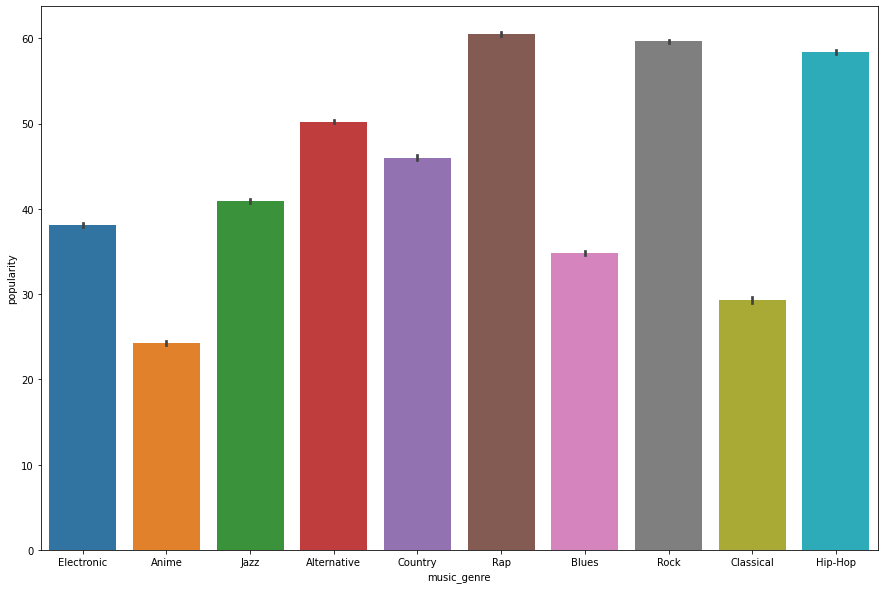

In [ ]:
plt.figure(figsize=[15, 10])
sns.barplot(x=df_music.music_genre, y=df_music.popularity)

In [ ]:
#Вывод информации о наборе данных
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:


columns = ['key','mode','tempo']
for column in columns:
    print(df_music[column].unique())



['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
['Minor' 'Major' nan]
['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']


Удаление дупликатов и пропусков

In [ ]:
df2=df_music.copy()
df2 = df2.drop_duplicates()
df2['tempo'] = df2['tempo'].replace('?',np.nan)
df2= df2.dropna(axis=0)
df2.shape

<ipython-input-8-6c13ff1c6616>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tempo'] = df2['tempo'].replace('?',np.nan)


(45020, 18)

Удаление нерелевантных колонок

In [ ]:
df2 = df2.drop(columns = ['instance_id', 'artist_name', 'track_name', 'obtained_date','loudness','duration_ms'])
df2.head(5)

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,Major,0.0413,145.036,0.323,Electronic


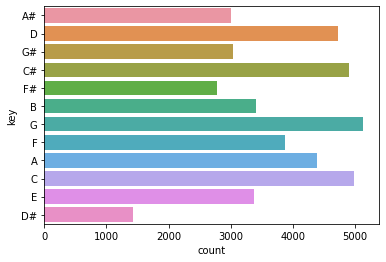

In [ ]:
sns.countplot(y=df2["key"])

Нормализация данных

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2['key'] = LabelEncoder().fit_transform(df2['key'])
df2['mode'] = df2['mode'].replace({'Minor' : 0,'Major' : 1})
df2['music_genre'] = df2['music_genre'].replace({'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5,'Blues':5, 'Rock':6, 'Classical':7, 'Hip-Hop':8})
df2["tempo"] = df2["tempo"].astype("float")
df2["popularity"] = df2["popularity"].astype("int")
#df2['music_genre'] = LabelEncoder().fit_transform(df2['music_genre'])
#df2['duration_ms'] = LabelEncoder().fit_transform(df2['duration_ms'])
#df2['tempo'] = LabelEncoder().fit_transform(df2['tempo'])
#df2['mode'] = LabelEncoder().fit_transform(df2['mode'])
df2.dtypes

popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
music_genre           int64
dtype: object

In [ ]:
df2.describe()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,tempo,valence,music_genre
count,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.306596,0.558532,0.599553,0.181843,5.350578,0.193951,0.641359,0.093783,119.952961,0.456394,4.106264
std,15.553972,0.341391,0.178858,0.264510,0.325847,3.460945,0.161715,0.479607,0.101469,30.641701,0.247161,2.467216
min,0.000000,0.000000,0.059600,0.000792,0.000000,0.000000,0.009670,0.000000,0.022300,34.347000,0.000000,0.000000
25%,34.000000,0.020100,0.442000,0.432000,0.000000,3.000000,0.096900,0.000000,0.036100,94.941500,0.257000,2.000000
50%,45.000000,0.145000,0.568000,0.642000,0.000159,5.000000,0.126000,1.000000,0.048900,119.879000,0.448000,5.000000
75%,56.000000,0.551000,0.687000,0.815250,0.154000,8.000000,0.244000,1.000000,0.098800,140.471250,0.648000,6.000000
max,99.000000,0.996000,0.986000,0.999000,0.996000,11.000000,1.000000,1.000000,0.942000,220.276000,0.992000,8.000000


Определение выбросов

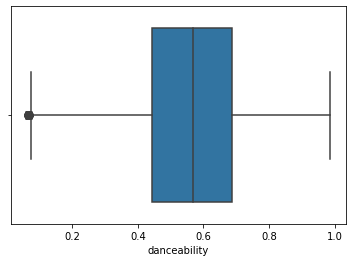

In [ ]:
cols = ['duration_ms','danceability','instrumentalness', 'liveness','popularity','acousticness','energy','speechiness','tempo','valence']

sns.boxplot(x=df2[cols[1]])


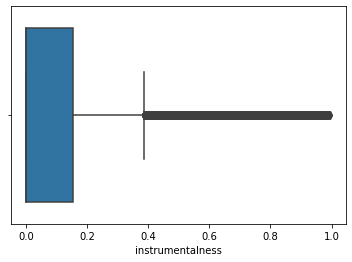

In [ ]:
sns.boxplot(x=df2[cols[2]])


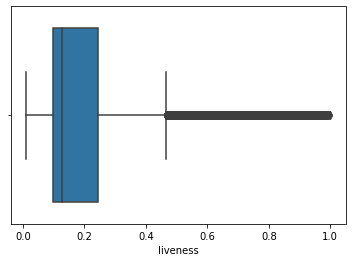

In [ ]:
sns.boxplot(x=df2[cols[3]])

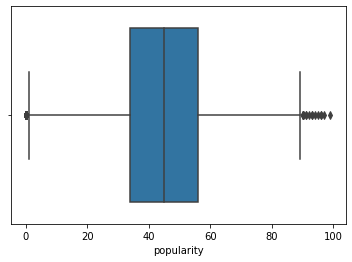

In [ ]:
sns.boxplot(x=df2[cols[4]])

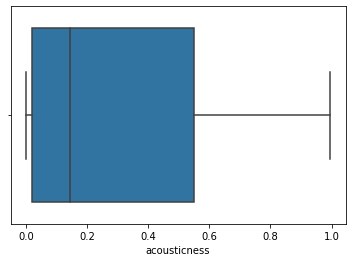

In [ ]:
sns.boxplot(x=df2[cols[5]])

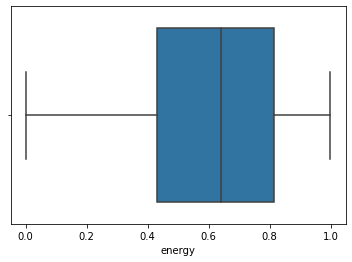

In [ ]:
sns.boxplot(x=df2[cols[6]])

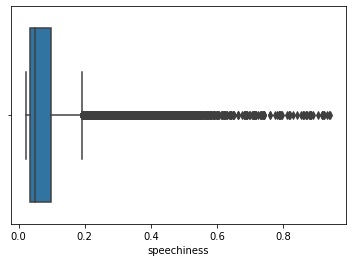

In [ ]:
sns.boxplot(x=df2[cols[7]])

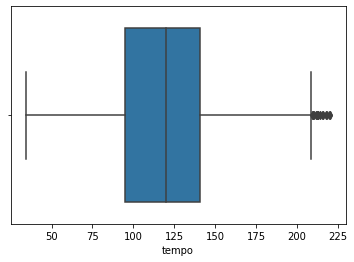

In [ ]:
sns.boxplot(x=df2[cols[8]])

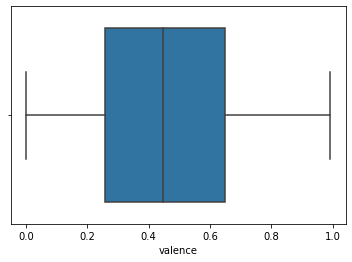

In [ ]:
sns.boxplot(x=df2[cols[9]])

Отфильтровываем нулеве значения


In [ ]:
df2.shape

(45020, 12)

In [ ]:
#df2 = df2[df2.duration_ms>0]
df2 = df2[df2.popularity>=0]
df2 = df2[df2.instrumentalness>=0]
df2 = df2[df2.danceability>=0]
df2.shape

(45020, 12)

Тепловая карта

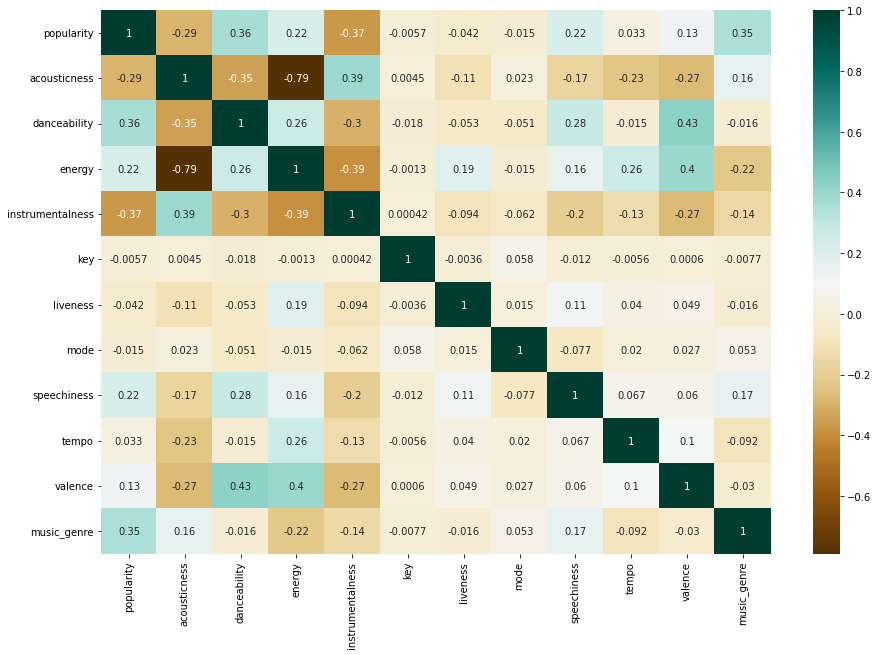

In [ ]:
plt.figure(figsize=(15,10))
c= df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Разделение данных

In [ ]:
df_d = df2

df_d.shape
df = df_d[df_d.music_genre==5]
df = df[:4500]
df_d = df_d[df_d.music_genre!=5]
df =pd.concat([df_d, df], ignore_index=True)
len(df)

40546

In [ ]:

#features
X = df.drop(['music_genre'], axis=1)
#labels
Y = df['music_genre']

Убедимся, что в датафрейме песни делятся по жанрам поровну:

In [ ]:
df['music_genre'].value_counts()


6    4561
2    4521
8    4520
7    4500
5    4500
1    4497
3    4495
4    4486
0    4466
Name: music_genre, dtype: int64

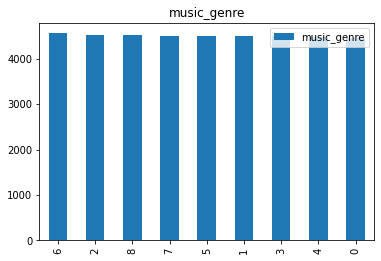

In [ ]:
Y.value_counts().plot(kind='bar', label='music_genre')
plt.legend()
plt.title('music_genre');

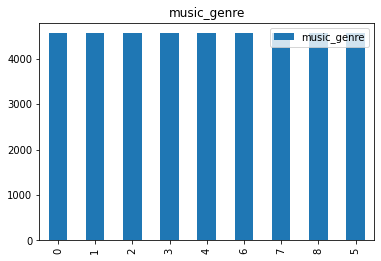

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)


Y.value_counts().plot(kind='bar', label='music_genre')
plt.legend()
plt.title('music_genre');

# Лабораторная работа №1
---
### Классификация

In [ ]:
#функция ROC-кривой
def ROC_curve(model, X_test, Y_test):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

In [ ]:


def do_fit_and_predict(model, dataframe) -> "(predicts, class_report, conf_matrix)":
    #features
    X = df2.drop(['music_genre'], axis=1)
    #labels
    Y = df2['music_genre']
    from imblearn.over_sampling import SMOTE
    sm=SMOTE()
    X,Y=sm.fit_resample(X,Y)
    #разделили анные на тестовые и тренировочные
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    class_report = classification_report(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)

    ROC_data = [model,X_test,Y_test,X_train]
    return (Y_pred, class_report, conf_matrix, ROC_data)


### Обучение моделей без GridSearch

Логистическая регрессия

In [ ]:
#Logistic Regression
model = LogisticRegression()
preds, class_report, conf_matrix, ROC_data_lr = do_fit_and_predict(model, df2)
print(conf_matrix)
print(class_report) # третий(или четвертый, как считать, "duration_ms") лучший по всем видам ошибок

[[ 449    9   36    6  327  100  116   95   46  269]
 [  39  901  193  241   48   80    0   26    2    4]
 [  64  292  685   36  189   60    4  159    1   46]
 [  19   87   44 1198   14   33    0   80    0    6]
 [  92   24  117    5  868   39   24   55   14  258]
 [ 105  121   81   14   71  882   50  149   24   45]
 [ 106    0    0    0   46   17  726   19  447   92]
 [  47   60  187  133  155  209   34  576    5   49]
 [ 101    2    0    0   50    8  599   12  513  195]
 [ 168    6    6    1  156   15   30   35   73  951]]
              precision    recall  f1-score   support

           0       0.38      0.31      0.34      1453
           1       0.60      0.59      0.59      1534
           2       0.51      0.45      0.47      1536
           3       0.73      0.81      0.77      1481
           4       0.45      0.58      0.51      1496
           5       0.61      0.57      0.59      1542
           6       0.46      0.50      0.48      1453
           7       0.48      0.40   

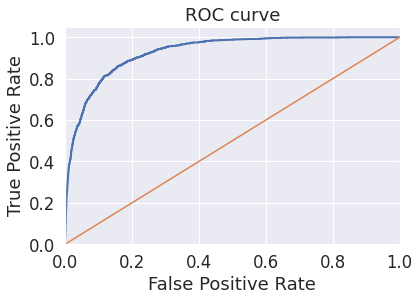

In [ ]:
ROC_curve(ROC_data_lr[0],ROC_data_lr[1],ROC_data_lr[2])

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
preds, class_report, conf_matrix,ROC_data_rfc = do_fit_and_predict(model, df2)
print(conf_matrix)
print(class_report)

[[2159   98  263  153   60   41   93   12   56]
 [ 109 2331   63   79  105   84   16  179    3]
 [ 268   38 2010   96  126   92   87  138   46]
 [ 144   17  157 1482  268   51  554    8  266]
 [  20   18  116  136 2142   47  418    2   48]
 [ 107  217  237  157  206  670  246   24 1088]
 [  16    9   56  296  182   72 2270    9  105]
 [  42   87  146   53   11   24    9 2687    0]
 [  25    0   18   85   20  432   86    0 2262]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      2935
           1       0.83      0.79      0.81      2969
           2       0.66      0.69      0.67      2901
           3       0.58      0.50      0.54      2947
           4       0.69      0.73      0.71      2947
           5       0.44      0.23      0.30      2952
           6       0.60      0.75      0.67      3015
           7       0.88      0.88      0.88      3059
           8       0.58      0.77      0.67      2928

    accuracy             

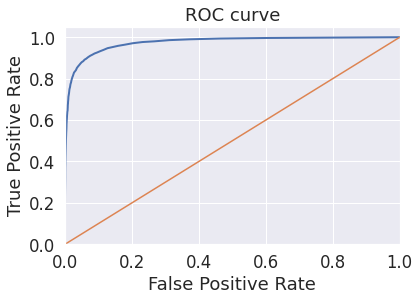

In [ ]:
ROC_curve(ROC_data_rfc[0],ROC_data_rfc[1],ROC_data_rfc[2])

Метод опорных векторов

In [ ]:
#SVC
model = SVC()
preds, class_report, conf_matrix,ROC_data_svc = do_fit_and_predict(model, df2)

print(conf_matrix)
print(class_report)

[[1981  169  283  215   89   33   67   18   80]
 [ 131 2219   88   94  103   74   12  247    1]
 [ 302   88 1768  114  217   86  100  167   59]
 [ 160   19  155 1200  432   20  592    4  365]
 [  75   64  157  192 1780   58  552    5   64]
 [  97  279  229  160  234  491  300   22 1140]
 [  30    8   77  319  191   14 2235    6  135]
 [  53   98  156   63   14   26    4 2645    0]
 [  21    0   24  129   23    8  150    0 2573]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      2935
           1       0.75      0.75      0.75      2969
           2       0.60      0.61      0.61      2901
           3       0.48      0.41      0.44      2947
           4       0.58      0.60      0.59      2947
           5       0.61      0.17      0.26      2952
           6       0.56      0.74      0.64      3015
           7       0.85      0.86      0.86      3059
           8       0.58      0.88      0.70      2928

    accuracy             

In [ ]:
#ROC_curve(ROC_data_svc[0],ROC_data_svc[1],ROC_data_svc[2])

КНН

In [ ]:
#KNN
model = KNeighborsClassifier()
preds, class_report, conf_matrix,ROC_data_knn = do_fit_and_predict(model, df2)

print(conf_matrix)
print(class_report)

[[2001  165  241  197  137   58   46   23   67]
 [ 205 2113   85   90  146   80    7  241    2]
 [ 344  104 1763  123  217   88   50  151   61]
 [ 213   78  171 1398  378   97  388   15  209]
 [  92   81  186  338 1824   75  292    7   52]
 [ 175  272  285  224  317  564  257   20  838]
 [  77   29  115  542  451   93 1625    9   74]
 [  52  123  158   51   25   35   11 2604    0]
 [  68    6   46  225   60  461  132    0 1930]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2935
           1       0.71      0.71      0.71      2969
           2       0.58      0.61      0.59      2901
           3       0.44      0.47      0.46      2947
           4       0.51      0.62      0.56      2947
           5       0.36      0.19      0.25      2952
           6       0.58      0.54      0.56      3015
           7       0.85      0.85      0.85      3059
           8       0.60      0.66      0.63      2928

    accuracy             

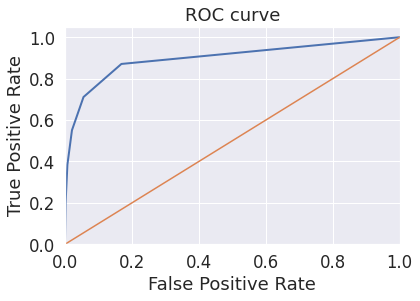

In [ ]:
ROC_curve(ROC_data_knn[0],ROC_data_knn[1],ROC_data_knn[2])

Наивный Байес

In [ ]:
#Naive Bayes
model = BernoulliNB()
preds, class_report, conf_matrix,ROC_data_nb = do_fit_and_predict(model, df2)
print(conf_matrix)
print(class_report)

[[1478  393  321  128  138  107  173  102   95]
 [ 431 1151  197   21  324   74   58  708    5]
 [ 328  247 1069   22  247  108  151  610  119]
 [ 216  239  168  539  277   56  971  112  369]
 [ 100  319  212   65 1002   61  892  205   91]
 [ 100  447  281  222  392  102  389  136  883]
 [  67    7  115  396  446   23 1686  146  129]
 [  29  131  102   16   29    9   20 2723    0]
 [  25    1   62  302  106   38  307   10 2077]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.52      2935
           1       0.39      0.39      0.39      2969
           2       0.42      0.37      0.39      2901
           3       0.32      0.18      0.23      2947
           4       0.34      0.34      0.34      2947
           5       0.18      0.03      0.06      2952
           6       0.36      0.56      0.44      3015
           7       0.57      0.89      0.70      3059
           8       0.55      0.71      0.62      2928

    accuracy             

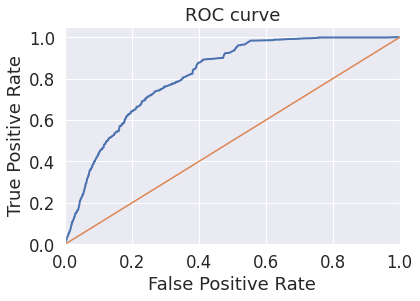

In [ ]:
ROC_curve(ROC_data_nb[0],ROC_data_nb[1],ROC_data_nb[2])

Дерево решений

In [ ]:
#Decision Tree
model = DecisionTreeClassifier()
preds, class_report, conf_matrix,ROC_data_dt = do_fit_and_predict(model, df2)
print(conf_matrix)
print(class_report)

[[1775  183  335  224   72  150   80   67   49]
 [ 162 2092   77   75  107  211   19  224    2]
 [ 355   99 1553  165  187  235   90  173   44]
 [ 241   96  198 1191  347  235  408   29  202]
 [  73  108  168  308 1674  210  337   21   48]
 [ 161  244  276  225  187  836  187   58  778]
 [  68   25   95  478  367  225 1613   23  121]
 [  41  208  247   46   24   66   15 2410    2]
 [  48    6   70  212   70  895  134    0 1493]]
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      2935
           1       0.68      0.70      0.69      2969
           2       0.51      0.54      0.52      2901
           3       0.41      0.40      0.41      2947
           4       0.55      0.57      0.56      2947
           5       0.27      0.28      0.28      2952
           6       0.56      0.53      0.55      3015
           7       0.80      0.79      0.79      3059
           8       0.55      0.51      0.53      2928

    accuracy             

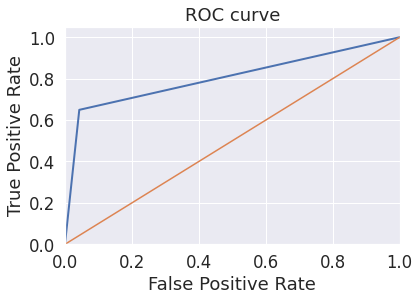

In [ ]:
ROC_curve(ROC_data_dt[0],ROC_data_dt[1],ROC_data_dt[2])

Случайный лес

In [ ]:
#Random Forest
model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')
preds, class_report, conf_matrix,ROC_data_rf = do_fit_and_predict(model, df2)
print(conf_matrix)
print(class_report)

[[2191   99  272  146   54   49   68   15   41]
 [ 105 2359   67   75  101   76   12  173    1]
 [ 244   44 2052  101  124   85   78  135   38]
 [ 127   20  148 1548  282   58  496    5  263]
 [  28   16  114  179 2107   50  409    3   41]
 [ 104  235  247  157  204  664  244   21 1076]
 [  17   10   51  302  194   67 2263   11  100]
 [  46   82  132   42   10   28    9 2710    0]
 [  16    0   17   93   24  442   82    0 2254]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      2935
           1       0.82      0.79      0.81      2969
           2       0.66      0.71      0.68      2901
           3       0.59      0.53      0.55      2947
           4       0.68      0.71      0.70      2947
           5       0.44      0.22      0.30      2952
           6       0.62      0.75      0.68      3015
           7       0.88      0.89      0.88      3059
           8       0.59      0.77      0.67      2928

    accuracy             

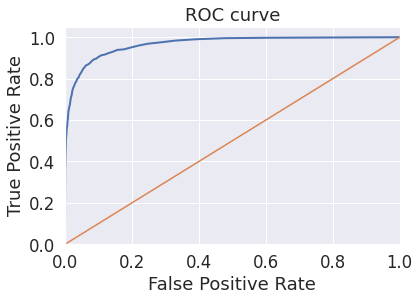

In [ ]:
ROC_curve(ROC_data_rf[0],ROC_data_rf[1],ROC_data_rf[2])

popularity          0.186939
acousticness        0.104147
energy              0.099933
danceability        0.099821
speechiness         0.099639
instrumentalness    0.087543
valence             0.077243
duration_ms         0.073716
tempo               0.063616
liveness            0.057549
key                 0.037259
mode                0.012594
dtype: float64

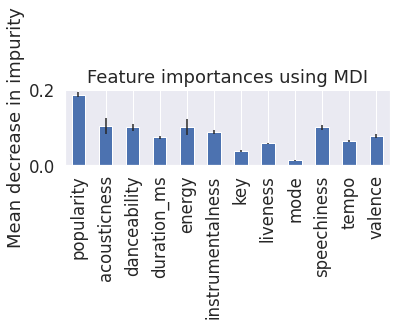

In [ ]:
feature_names = X_train.columns
importances = ROC_data_rf[0].feature_importances_
std = np.std([tree.feature_importances_ for tree in ROC_data_rf[0].estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

feature_scores = pd.Series(ROC_data_rf[0].feature_importances_, index=feature_names).sort_values(ascending=False)

feature_scores


XGBoost

In [ ]:
#XGBC
import xgboost as xgb
model = xgb.XGBClassifier()
preds, class_report, conf_matrix,ROC_data_xb = do_fit_and_predict(model, df2)
print(conf_matrix)
print(class_report)

[[1926  152  355  211   70   43  107   14   57]
 [ 147 2181   87  109  144   59   16  225    1]
 [ 346   57 1750  127  188   52  126  191   64]
 [ 177   16  186 1122  374   18  696    6  352]
 [  40   17  150  217 1874   38  532    4   75]
 [ 127  393  252  167  251  272  348   27 1115]
 [  15    8   62  240  159    7 2348   10  166]
 [  62  114  183   64   16    8   14 2598    0]
 [  30    0   27   70   43   14  198    0 2546]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      2935
           1       0.74      0.73      0.74      2969
           2       0.57      0.60      0.59      2901
           3       0.48      0.38      0.43      2947
           4       0.60      0.64      0.62      2947
           5       0.53      0.09      0.16      2952
           6       0.54      0.78      0.63      3015
           7       0.84      0.85      0.85      3059
           8       0.58      0.87      0.70      2928

    accuracy             

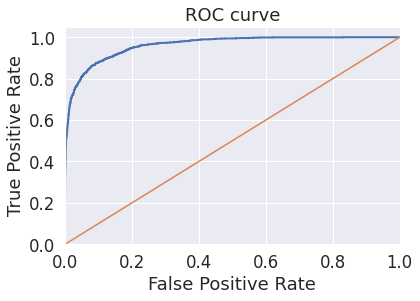

In [ ]:
ROC_curve(ROC_data_xb[0],ROC_data_xb[1],ROC_data_xb[2])

acousticness        0.189527
popularity          0.185877
instrumentalness    0.151911
speechiness         0.125836
energy              0.101003
mode                0.074934
danceability        0.073164
valence             0.041346
tempo               0.028736
liveness            0.014201
key                 0.013466
dtype: float32

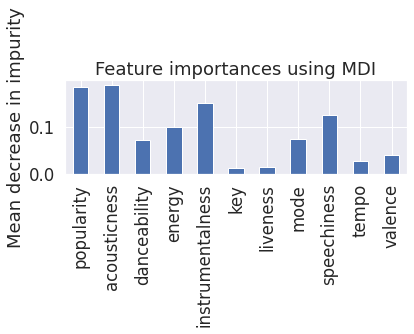

In [ ]:

feature_names = X_train.columns

importances = ROC_data_xb[0].feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

feature_scores = pd.Series(ROC_data_xb[0].feature_importances_, index=feature_names).sort_values(ascending=False)

feature_scores



## GridSearch

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Логистическая регрессия

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

params_LR = {#"tol": [0.0001,0.0002,0.0003],
            #"C": [0.01, 0.1, 1, 10, 100],
            #"intercept_scaling": [1, 2, 3, 4],
            'max_iter' : [10, 100, 1000, 3000],
            'random_state' : [0, 10, 100, 250,None],
              }

logreg = LogisticRegression()
random_search = GridSearchCV(estimator=logreg, param_grid=params_LR, cv=2, n_jobs=-1)
start_time = timer(None)
random_search.fit(X_train, Y_train)
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_logreg = random_search.best_params_




 Затрачено времени: 0 часов 0 минут и 38.96 секунд.
{'max_iter': 10, 'random_state': 0}
0.5756202583555464


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = LogisticRegression(**rf_bp_logreg)
model.fit(X_train, Y_train)
Y_pred_lr = model.predict(X_test)
class_report = classification_report(Y_test, Y_pred_lr)
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
print(conf_matrix)
print(class_report)


[[1694  193  246  191   95  104   50   29   62]
 [ 162 1802  107   89  136   23    7  330    0]
 [ 340   91 1438   56  245  177   69  165   52]
 [ 139   16  172  956  482  244  433    6  220]
 [  51   36  105  195 1727  145  368   11   26]
 [  99  370  239  171  430  200  234   43  853]
 [  17    5   49  366  300   60 1789    3   85]
 [  51  209  206   61   35    1    7 2186    0]
 [  33    1   20  160   93  261  165    0 1935]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2664
           1       0.66      0.68      0.67      2656
           2       0.56      0.55      0.55      2633
           3       0.43      0.36      0.39      2668
           4       0.49      0.65      0.56      2664
           5       0.16      0.08      0.10      2639
           6       0.57      0.67      0.62      2674
           7       0.79      0.79      0.79      2756
           8       0.60      0.73      0.66      2668

    accuracy             

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


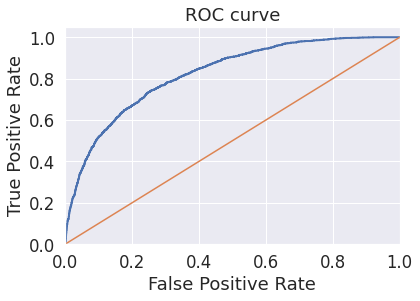

In [ ]:
ROC_curve(model, X_test, Y_test)

### Метод-KNN

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Находим лучшие параметры
k_range = list(range(10, 20))
params_knn = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
random_search = GridSearchCV(estimator=knn, param_grid=params_knn, cv = 2) #cv=5 дефолтно, можно не указывать
start_time = timer(None)
random_search.fit(X_train, Y_train)
timer(start_time)
print(f"random_search.best_params_ = {random_search.best_params_}")
print(f"random_search.best_score_ = {random_search.best_score_}")

knn_bp = random_search.best_params_


 Затрачено времени: 0 часов 2 минут и 51.47 секунд.
random_search.best_params_ = {'n_neighbors': 19}
random_search.best_score_ = 0.5875128152552799


In [ ]:
model_knn = KNeighborsClassifier(**knn_bp)
#preds, class_report, conf_matrix, ROC_knn = do_fit_and_predict(model_knn, df2)
model.fit(X_train, Y_train)
Y_pred_lr = model.predict(X_test)
class_report = classification_report(Y_test, Y_pred_lr)
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
print(conf_matrix)
print(class_report)

[[1694  193  246  191   95  104   50   29   62]
 [ 162 1802  107   89  136   23    7  330    0]
 [ 340   91 1438   56  245  177   69  165   52]
 [ 139   16  172  956  482  244  433    6  220]
 [  51   36  105  195 1727  145  368   11   26]
 [  99  370  239  171  430  200  234   43  853]
 [  17    5   49  366  300   60 1789    3   85]
 [  51  209  206   61   35    1    7 2186    0]
 [  33    1   20  160   93  261  165    0 1935]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2664
           1       0.66      0.68      0.67      2656
           2       0.56      0.55      0.55      2633
           3       0.43      0.36      0.39      2668
           4       0.49      0.65      0.56      2664
           5       0.16      0.08      0.10      2639
           6       0.57      0.67      0.62      2674
           7       0.79      0.79      0.79      2756
           8       0.60      0.73      0.66      2668

    accuracy             

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


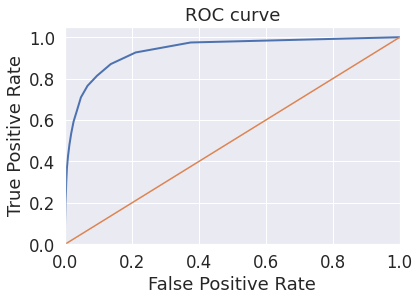

In [ ]:
ROC_curve(model_knn, X_test, Y_test)

### Дерево решений

In [ ]:
params_rfc = {
    'max_depth' : [5, 10, 50, None],      # Макс. глубина
    'random_state' : [0, 10, 100, 250, None],
    'splitter': ["best", "random"],
}

dt = DecisionTreeClassifier()
random_search = GridSearchCV(estimator=dt, param_grid=params_rfc, cv=2, n_jobs=-1)
start_time = timer(None)
random_search.fit(X_train, Y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_dt = random_search.best_params_




 Затрачено времени: 0 часов 0 минут и 9.17 секунд.
{'max_depth': 10, 'random_state': 10, 'splitter': 'best'}
0.5053660152368333


In [ ]:
model = DecisionTreeClassifier(**rf_bp_dt)
model.fit(X_train, Y_train)
Y_pred_lr = model.predict(X_test)
class_report = classification_report(Y_test, Y_pred_lr)
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
print(conf_matrix)
print(class_report)

[[ 549   18   34    3  166   81   96   78   88  340]
 [  59 1010  159  113   62   77    0   45    2    7]
 [ 116  175  636   31  158  128   12  215    5   60]
 [  32   99   47 1155   14   42    0   83    0    9]
 [ 193   21   46    2  747   32   28  112   33  282]
 [ 170   79  174    9   51  705   40  218   28   68]
 [  96    0    2    0   12   14  531   12  666  120]
 [ 131   24  172   90   97  154   26  657   31   73]
 [  54    2    4    0   15    7  500   10  672  216]
 [ 120    6    9    5   88   10   76   19   96 1012]]
              precision    recall  f1-score   support

           0       0.36      0.38      0.37      1453
           1       0.70      0.66      0.68      1534
           2       0.50      0.41      0.45      1536
           3       0.82      0.78      0.80      1481
           4       0.53      0.50      0.51      1496
           5       0.56      0.46      0.51      1542
           6       0.41      0.37      0.38      1453
           7       0.45      0.45   

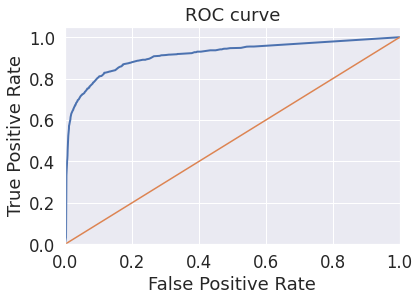

In [ ]:
ROC_curve(model, X_test, Y_test)

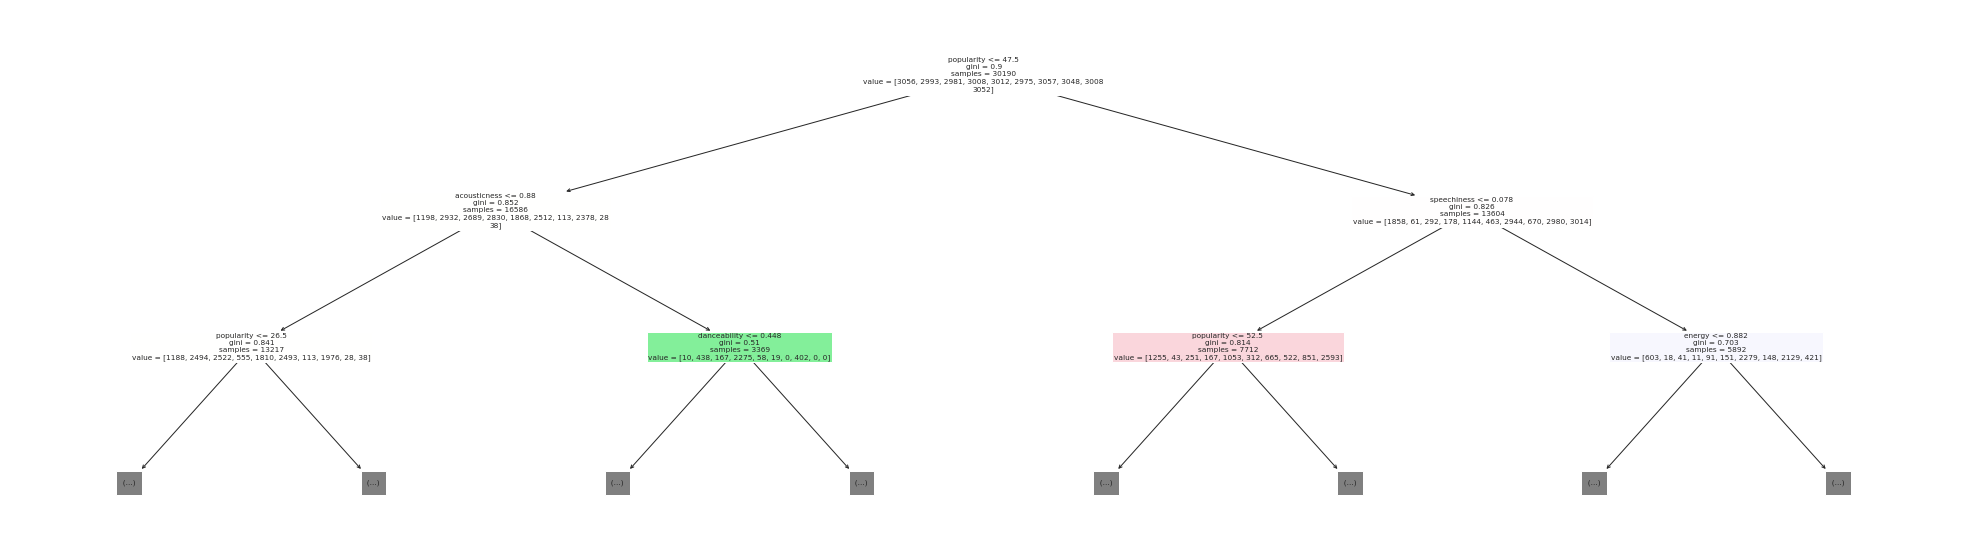

In [ ]:
from sklearn import tree
feature_names = X_train.columns

plt.figure(figsize=(35, 10))
tree.plot_tree(model,max_depth = 2,feature_names = feature_names.tolist(), filled = True);

plt.show()

### Случайный лес

In [ ]:
# params_rfc = {
#     'random_state' : [0, 10, 100, 250, None],
#     'n_estimators': [10, 50, 100, 250],  # Сколько деревьев
#     'max_depth' : [5, 10, 50, None],      # Макс. глубина
#     'max_features' : ["sqrt", "log2", 1] # Количество функций, которые следует учитывать при поиске лучшего разделения
# }

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
rfc=RandomForestClassifier()
random_search = GridSearchCV(estimator=rfc, param_grid=parametrs, cv=2, n_jobs=-1)
X = df2.drop(['music_genre'], axis=1)
Y = df2['music_genre']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
start_time = timer(None)
random_search.fit(X_train, Y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp = random_search.best_params_


 Затрачено времени: 0 часов 13 минут и 5.36 секунд.
{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 50}
0.5626097546484188


In [ ]:

model_rfc = RandomForestClassifier(**rf_bp)
model_rfc.fit(X_train, Y_train)
Y_pred_lr = model.predict(X_test)
class_report = classification_report(Y_test, Y_pred_lr)
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
print(conf_matrix)
print(class_report)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

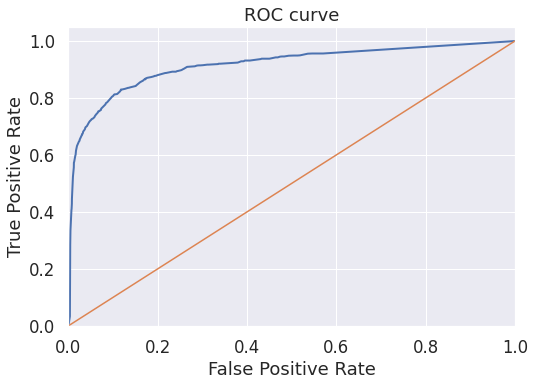

In [ ]:
ROC_curve(model, X_test, Y_test)

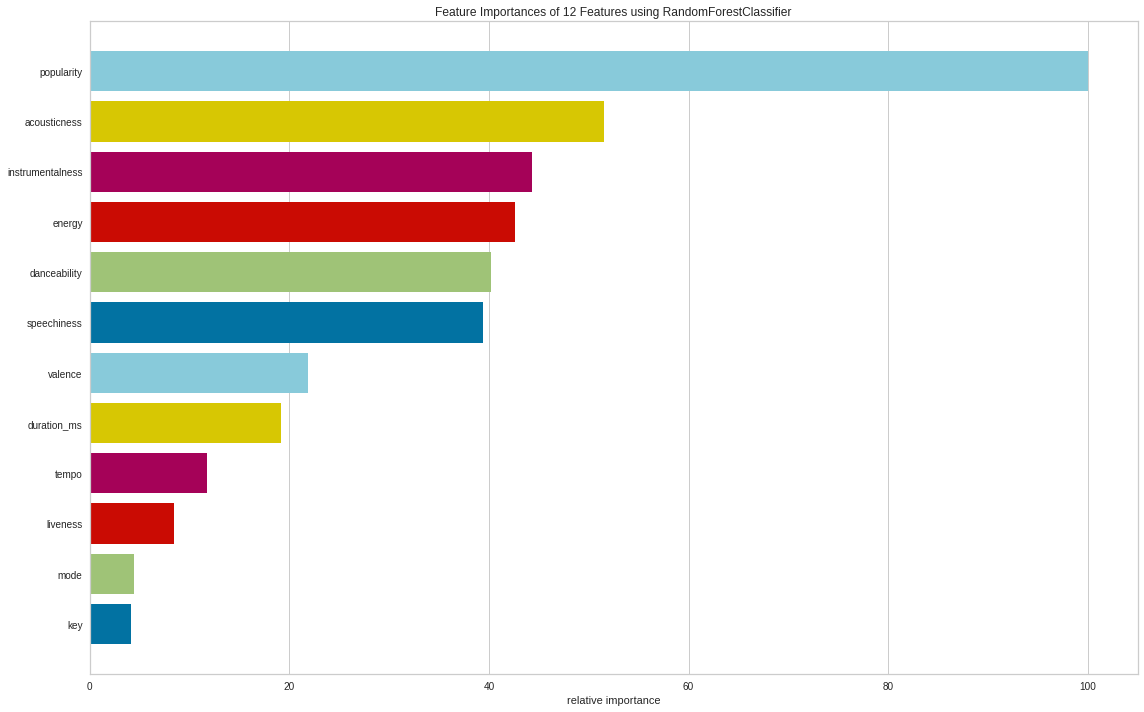

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(16,10))
viz = FeatureImportances(RandomForestClassifier(**rf_bp))
viz.fit(X_train, Y_train)
viz.show()

### XGBoost
---

В основе XGBoost лежит алгоритм градиентного бустинга деревьев решений. Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений. Обучение ансамбля проводится последовательно в отличие, например от бэггинга. На каждой итерации вычисляются отклонения предсказаний уже обученного ансамбля на обучающей выборке. Следующая модель, которая будет добавлена в ансамбль будет предсказывать эти отклонения. Таким образом, добавив предсказания нового дерева к предсказаниям обученного ансамбля мы можем уменьшить среднее отклонение модели, которое является таргетом оптимизационной задачи. Новые деревья добавляются в ансамбль до тех пор, пока ошибка уменьшается, либо пока не выполняется одно из правил "ранней остановки".


In [ ]:
params_boost = {
        'learning_rate': [0.02],
        'nthread': [1],
        'random_state': [42, 100, 145],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 5],
        'subsample': [0.6,  1.0],
        'colsample_bytree': [0.6,  1.0],
        'max_depth': [5, 10, 100],
        'n_estimators': [100, 1000]
        }

In [ ]:
# xgb = XGBClassifier(objective='binary:logistic')
# folds = 5
# param_comb = 5
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params_boost, n_iter=param_comb, scoring='accuracy',
#                                    n_jobs=-1, cv=skf.split(X_train, Y_train), verbose=3, random_state=1001 )
# start_time = timer(None)
# random_search.fit(X_train, Y_train)
# timer(start_time)
# print(random_search.best_params_)
# print(random_search.best_score_)
# xgb_bp = random_search.best_params_


X = df2.drop(['music_genre'], axis=1)
Y = df2['music_genre']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params_boost = {
        'random_state': [42, 100, 145],
        'min_child_weight': [0, 1, 5, 10],
       # 'gamma': [0.5, 1, 5],
       # 'subsample': [0.5,  1.0], #Соотношение подвыборки обучающих экземпляров
        'max_depth': [6, 10, 100],
        'n_estimators': [100, 1000]
        }

xgbClassifier = xgb.XGBClassifier(objective='binary:logistic')

random_search = RandomizedSearchCV(xgbClassifier,
                                   param_distributions=params_boost, scoring='accuracy',
                                   n_jobs=-1, cv=2, verbose=3, random_state=42)

start_time = timer(None)
random_search.fit(X_train, Y_train)
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
xgb_bp = random_search.best_params_



Fitting 2 folds for each of 10 candidates, totalling 20 fits

 Затрачено времени: 0 часов 48 минут и 31.32 секунд.
{'random_state': 42, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 6}
0.5794965220271613


In [ ]:
model = XGBClassifier(objective='binary:logistic', **xgb_bp)
model.fit(X_train, Y_train)
Y_pred_lr = model.predict(X_test)
class_report = classification_report(Y_test, Y_pred_lr)
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
print(conf_matrix)
print(class_report)

[[ 561   14   26    4  171   80  121   77   76  323]
 [  51 1157  106   90   41   58    0   22    1    8]
 [  93  152  800   16  135   72    9  190    4   65]
 [  22   62   39 1257    5   24    0   65    0    7]
 [ 109   17   62    2  867   17   36   76   23  287]
 [ 109   65   85   11   45  928   32  188   23   56]
 [  36    0    1    0   16   19  652   14  630   85]
 [  63   13  151   93   89  170   30  773    6   67]
 [  31    2    1    0   13    8  622   13  610  180]
 [ 105    5    6    2   84    9   60   34   81 1055]]
              precision    recall  f1-score   support

           0       0.48      0.39      0.43      1453
           1       0.78      0.75      0.77      1534
           2       0.63      0.52      0.57      1536
           3       0.85      0.85      0.85      1481
           4       0.59      0.58      0.59      1496
           5       0.67      0.60      0.63      1542
           6       0.42      0.45      0.43      1453
           7       0.53      0.53   

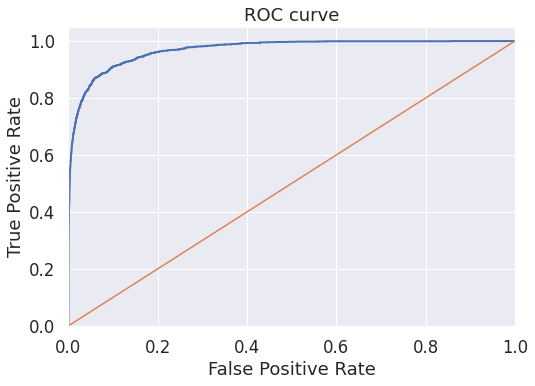

In [ ]:
ROC_curve(model, X_test, Y_test)

Важность признаков


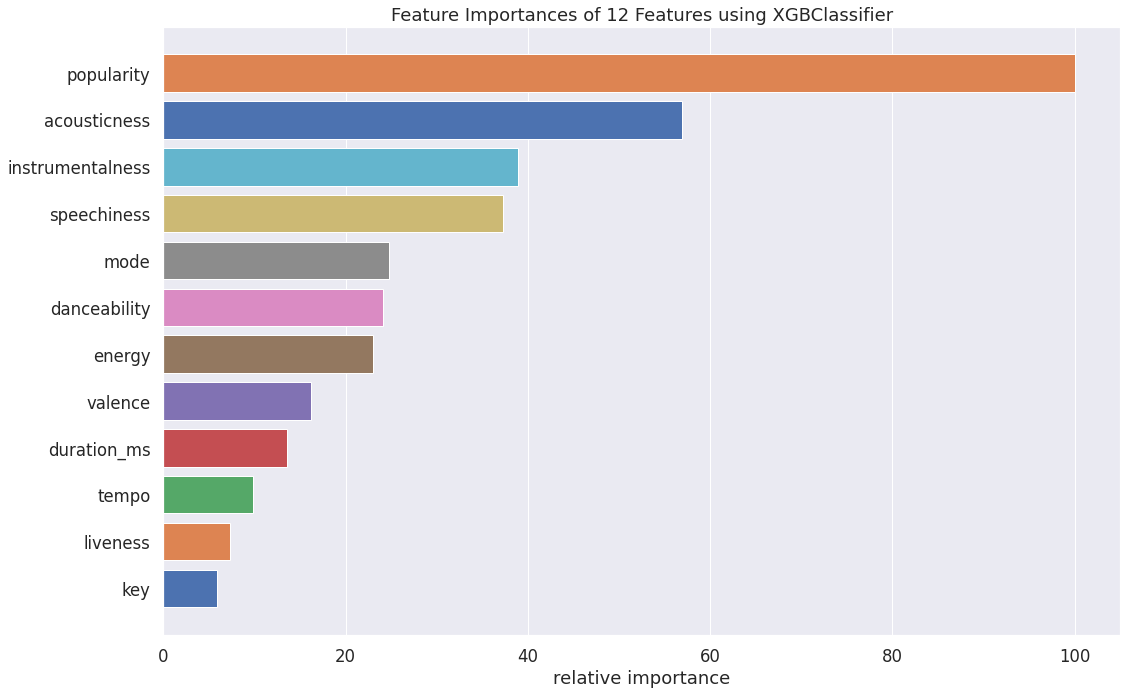

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances
X = df2.drop(['music_genre'], axis=1)
Y = df2['music_genre']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
plt.figure(figsize=(16,10))
viz = FeatureImportances(model)
viz.fit(X_train, Y_train)
viz.show()


# Лабораторная работа №2

---

### Кластеризация



In [ ]:
df1 = df[:20000]

In [ ]:
df1.head(20000)


,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,tempo,valence,music_genre
0,27,0.00468,0.652,0.941,0.792000,1,0.1150,0,0.0748,100.889,0.759,0
1,31,0.01270,0.622,0.890,0.950000,5,0.1240,0,0.0300,115.002,0.531,0
2,28,0.00306,0.620,0.755,0.011800,11,0.5340,1,0.0345,127.994,0.333,0
3,34,0.02540,0.774,0.700,0.002530,4,0.1570,1,0.2390,128.014,0.270,0
4,32,0.00465,0.638,0.587,0.909000,9,0.1570,1,0.0413,145.036,0.323,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,42,0.06050,0.629,0.611,0.000002,6,0.1420,1,0.0273,144.032,0.371,4
19996,52,0.02880,0.324,0.950,0.000000,0,0.3680,1,0.2050,186.346,0.657,4
19997,45,0.07690,0.636,0.651,0.000000,5,0.0681,1,0.0266,90.960,0.673,4
19998,57,0.55000,0.559,0.464,0.000000,9,0.1070,1,0.0272,98.354,0.351,4


In [ ]:
#features
X = df1.drop(['music_genre'], axis=1)
#labels
Y = df1['music_genre']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

###Обучение
---

####К-сердних

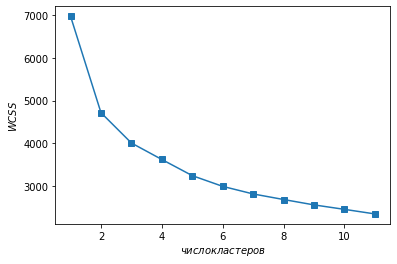

In [ ]:
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
#optimal clusters numb
plt.plot(range(1, 12), inertia, marker="s")
plt.xlabel("$число кластеров$")
plt.ylabel("$WCSS$");

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(X)
labels = k_means.labels_

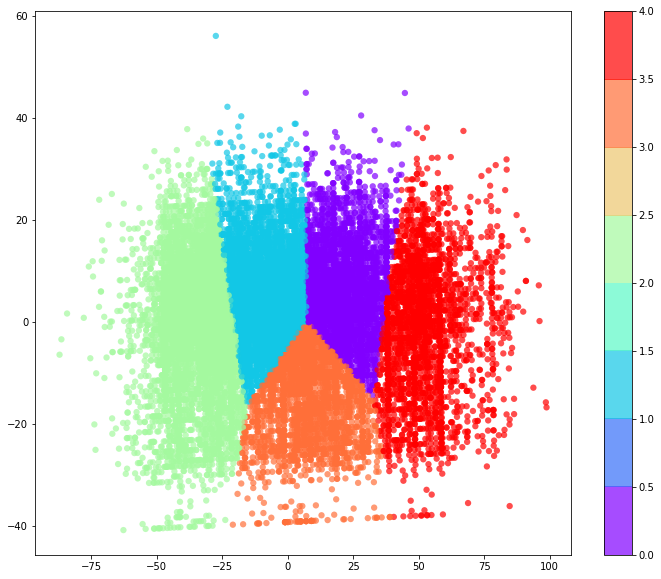

In [ ]:
#сжимаем датасет до 2х колонок
pca = PCA(n_components=2)
res = pca.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(
    res[:, 0],
    res[:, 1],
    c=labels,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("rainbow", 8),
)
plt.colorbar()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y, labels)

0.17785

PCA

In [ ]:
Y.describe()

count    40546.000000
mean         4.007646
std          2.580888
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: music_genre, dtype: float64

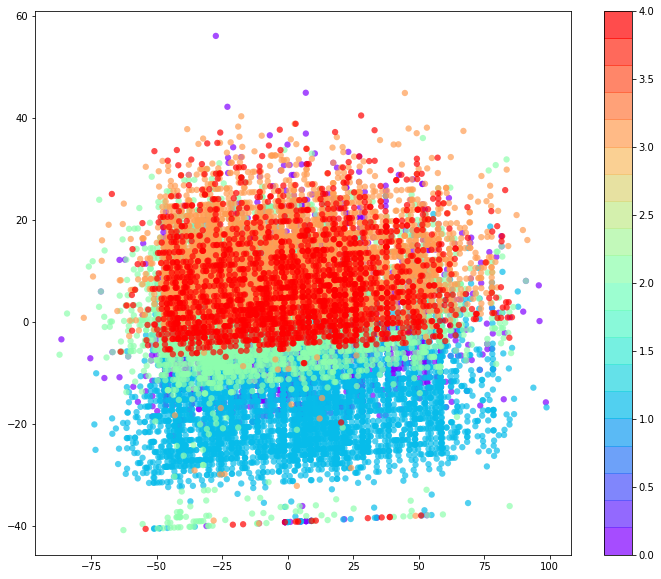

In [ ]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(
    res[:, 0],
    res[:, 1],
    c=Y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("rainbow", 20),
)
plt.colorbar()

In [ ]:
for i, component in enumerate(pca.components_):
    print(
        "{} component: {}% of initial variance".format(
            i + 1, round(100 * pca.explained_variance_ratio_[i], 2)
        )
    )

1 component: 83.87% of initial variance
2 component: 14.98% of initial variance


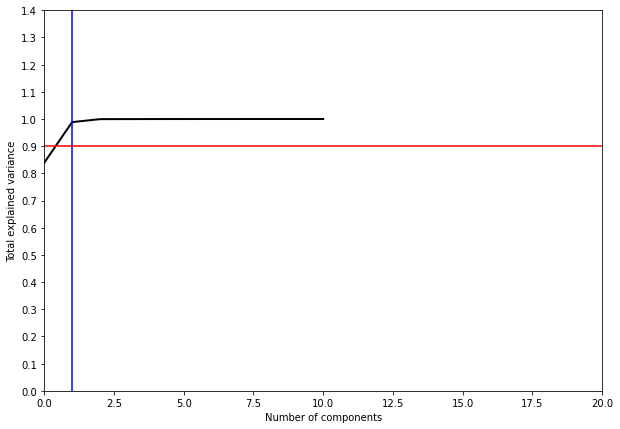

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA().fit(X)
 #доверительная дисперсия бльше 90 % - доверяем модели
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k", lw=2)
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.xlim(0, 20)
plt.yticks(np.arange(0, 1.5, 0.1))
plt.axvline(1, c="b")
plt.axhline(0.9, c="r")
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
res, Y, test_size=0.3, stratify=Y, random_state=42
)

clf = RandomForestClassifier(n_estimators=200, class_weight='balanced')
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.46267


Иерархия

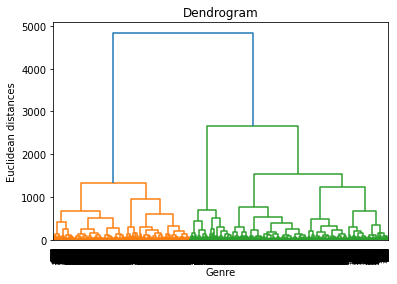

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Genre')
plt.ylabel('Euclidean distances')
plt.show()

DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=30).fit(X)
labels = dbscan.labels_
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 6767, 0: 12760, 1: 112, 2: 207, 3: 35, 4: 75, 5: 44}

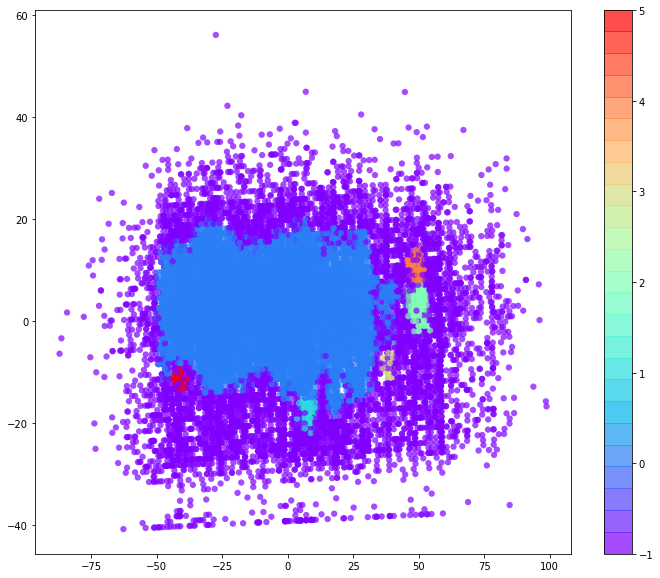

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(
    res[:, 0],
    res[:, 1],
    c=labels,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("rainbow", 25),
)
plt.colorbar()

MeanShift

In [ ]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=15).fit(X)
labels = ms.labels_
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 7499, 1: 7464, 2: 4965, 3: 72}

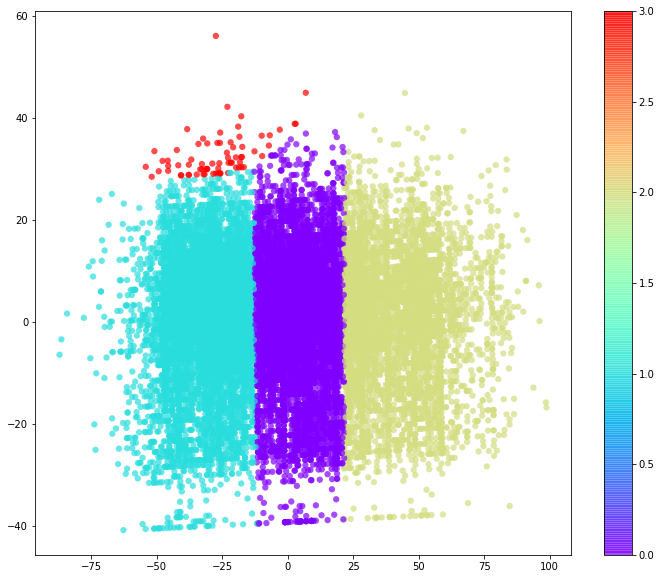

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(
    res[:, 0],
    res[:, 1],
    c=labels,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("rainbow", 295),
)
plt.colorbar()

EM

In [ ]:
from sklearn.mixture import GaussianMixture

EM = GaussianMixture(n_components=5)
em_res = EM.fit_predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(Y, em_res)

0.30115

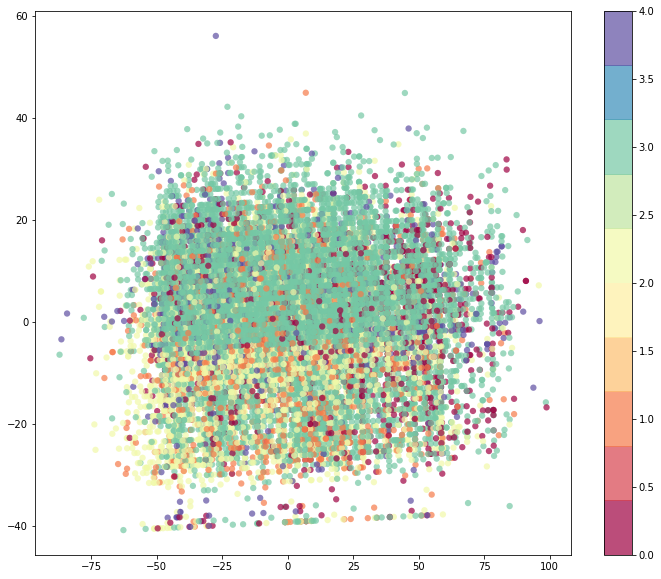

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(
    res[:, 0],
    res[:, 1],
    c=em_res,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("Spectral", 10),
)
plt.colorbar()

----
### Метрики



In [ ]:
data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=5, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=5))
#algorithms.append(GaussianMixture(n_components=5))
algorithms.append(DBSCAN(eps=3, min_samples=30))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(y, algo.labels_),
                "Homogenity": metrics.homogeneity_score(y, algo.labels_),
                "Completeness": metrics.completeness_score(y, algo.labels_),
                "V-measure": metrics.v_measure_score(y, algo.labels_),
                "Silhouette": metrics.silhouette_score(X, algo.labels_),
            }
        )
    )

results = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Agglomerative",  "DBSCAN"],
)

results

ValueError: ignored

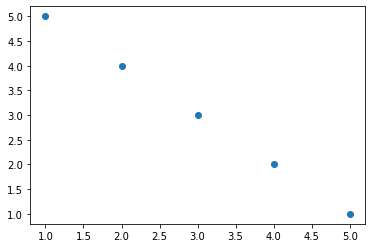

In [ ]:
import matplotlib.pyplot as plt

x = [4, 5, 2, 3, 1]
y = [2, 1, 4, 3, 5]
plt.scatter(x,y)
plt.show()